### IPL DATASET


##### Importing all the neccessary packages.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV


In [2]:
ipl = pd.read_csv("IPL_dataset.csv")



In [3]:
print(ipl.head())


   id    Season       city        date                        team1  \
0   1  IPL-2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
1   2  IPL-2017       Pune  06-04-2017               Mumbai Indians   
2   3  IPL-2017     Rajkot  07-04-2017                Gujarat Lions   
3   4  IPL-2017     Indore  08-04-2017       Rising Pune Supergiant   
4   5  IPL-2017  Bangalore  08-04-2017  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hy

In [4]:
print(ipl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

### DATA CLEANING 

#### Dropping unnecessary columns and checking over null values

In [5]:
ipl.drop(['id', 'umpire1', 'umpire2', 'umpire3'], axis=1, inplace=True)

In [6]:
ipl[ipl['winner'].isnull()]


,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,IPL-2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
545,IPL-2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,IPL-2015,Bangalore,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
744,IPL-2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium


In [7]:
ipl.dropna(subset=['winner'], inplace=True)
print(ipl.isnull().sum())

Season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64


#### Found null values in City so checking the venue column to get the city name 

In [8]:
ipl[ipl['city'].isnull()][['team1', 'team2', 'venue']]


,team1,team2,venue
461,Mumbai Indians,Royal Challengers Bangalore,Dubai International Cricket Stadium
462,Kolkata Knight Riders,Delhi Daredevils,Dubai International Cricket Stadium
466,Chennai Super Kings,Rajasthan Royals,Dubai International Cricket Stadium
468,Sunrisers Hyderabad,Delhi Daredevils,Dubai International Cricket Stadium
469,Mumbai Indians,Chennai Super Kings,Dubai International Cricket Stadium
474,Royal Challengers Bangalore,Kings XI Punjab,Dubai International Cricket Stadium
476,Sunrisers Hyderabad,Mumbai Indians,Dubai International Cricket Stadium


#### Replaced the null values with the correct city name.

In [9]:
ipl['city'] = ipl['city'].fillna('Dubai')
print(ipl['city'].isnull().sum())  
print(ipl['city'].value_counts())

0
city
Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Visakhapatnam      13
Bengaluru          13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Port Elizabeth      7
Ranchi              7
Cape Town           7
Cuttack             7
Dubai               7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: count, dtype: int64


In [10]:
ipl['city'] = ipl['city'].replace({'Bengalore': 'Bengaluru'})

In [11]:
print(ipl.describe())


       dl_applied  win_by_runs  win_by_wickets
count  752.000000   752.000000      752.000000
mean     0.025266    13.353723        3.368351
std      0.157036    23.513486        3.388114
min      0.000000     0.000000        0.000000
25%      0.000000     0.000000        0.000000
50%      0.000000     0.000000        4.000000
75%      0.000000    19.000000        6.000000
max      1.000000   146.000000       10.000000


In [12]:
print(ipl['result'].unique())

['normal' 'tie']


In [13]:
print(ipl[ipl['result'] == 'tie'].shape[0])

9


In [14]:
ipl = ipl[ipl['result'] != 'tie']

#### Checking Team names and handling duplicate values 

In [15]:
ipl['team1'].unique()



array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [16]:
ipl['team2'].unique()


array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [17]:
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
     'Pune Warriors': 'Rising Pune Supergiants'
    
}
ipl['team1'] = ipl['team1'].replace(team_name_mapping)
ipl['team2'] = ipl['team2'].replace(team_name_mapping)
ipl['toss_winner'] = ipl['toss_winner'].replace(team_name_mapping)
ipl['winner'] = ipl['winner'].replace(team_name_mapping)

In [18]:
print(ipl['team1'].unique())

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Capitals' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Kochi Tuskers Kerala']


### EXPLORATORY DATA ANALYSIS 

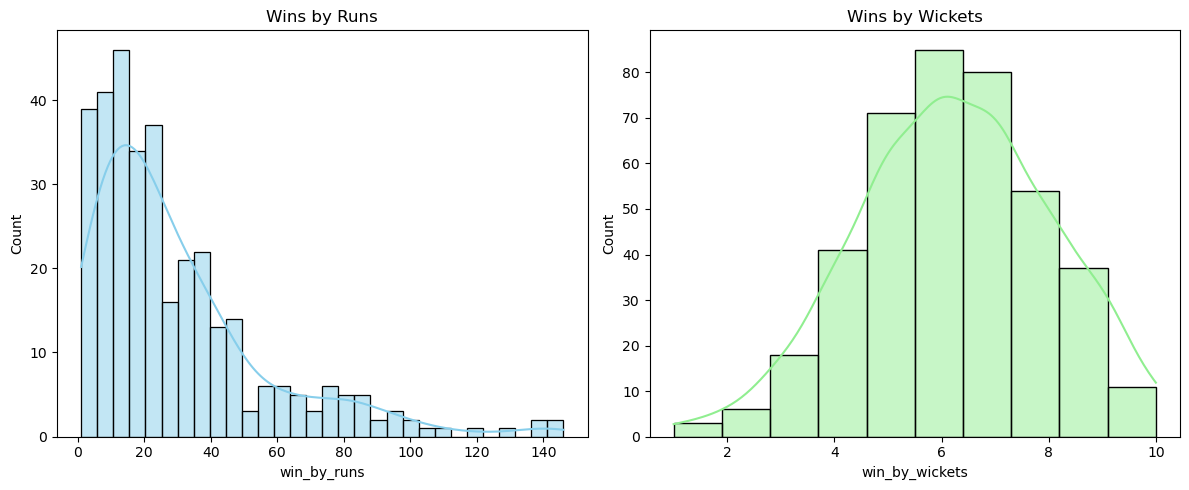

In [19]:
# Team Winning 
plt.figure(figsize=(12,5))

# Win by runs
plt.subplot(1, 2, 1)
sns.histplot(ipl[ipl['win_by_runs'] > 0]['win_by_runs'], kde=True, bins=30, color='skyblue')
plt.title('Wins by Runs')

# Win by wickets 
plt.subplot(1, 2, 2)
sns.histplot(ipl[ipl['win_by_wickets'] > 0]['win_by_wickets'], kde=True, bins=10, color='lightgreen')
plt.title('Wins by Wickets')

plt.tight_layout()
plt.show()



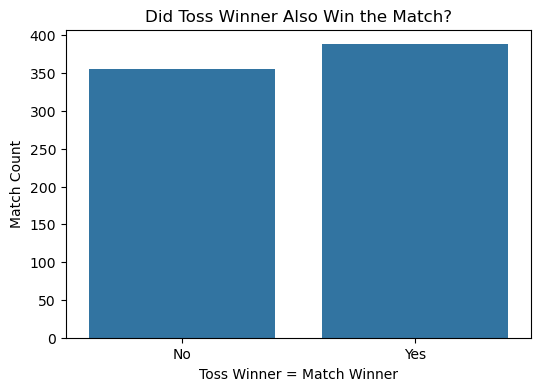

Percentage of matches where toss winner won the match:
toss_match_win
True     52.220727
False    47.779273
Name: proportion, dtype: float64


In [20]:
ipl['toss_match_win'] = ipl['toss_winner'] == ipl['winner']

plt.figure(figsize=(6,4))
sns.countplot(x=ipl['toss_match_win'])
plt.title('Did Toss Winner Also Win the Match?')
plt.xlabel('Toss Winner = Match Winner')
plt.ylabel('Match Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Percentage
print("Percentage of matches where toss winner won the match:")
print(ipl['toss_match_win'].value_counts(normalize=True) * 100)

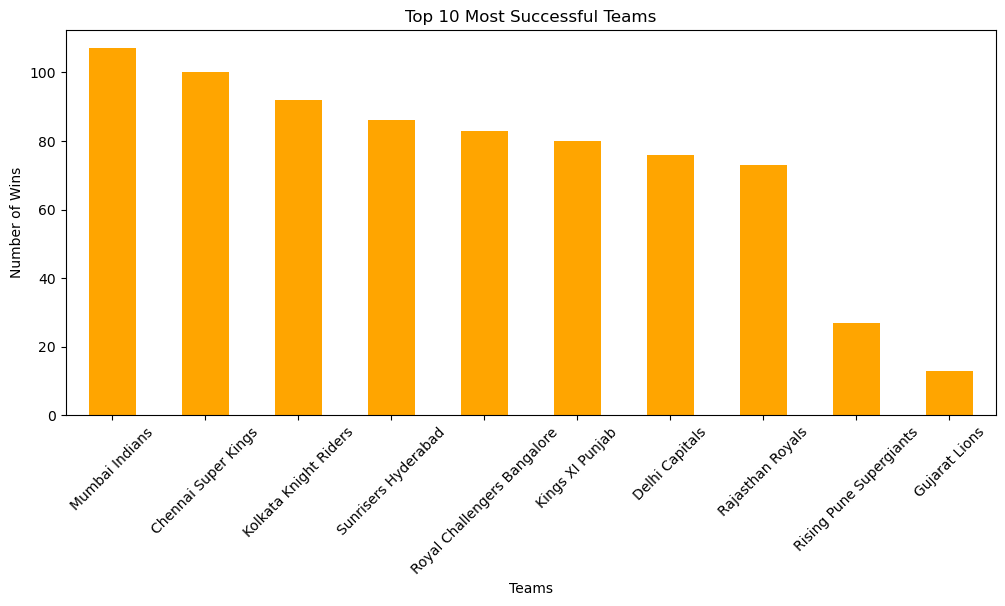

In [21]:
plt.figure(figsize=(12,5))
ipl['winner'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Most Successful Teams')
plt.ylabel('Number of Wins')
plt.xlabel('Teams')
plt.xticks(rotation=45)
plt.show()


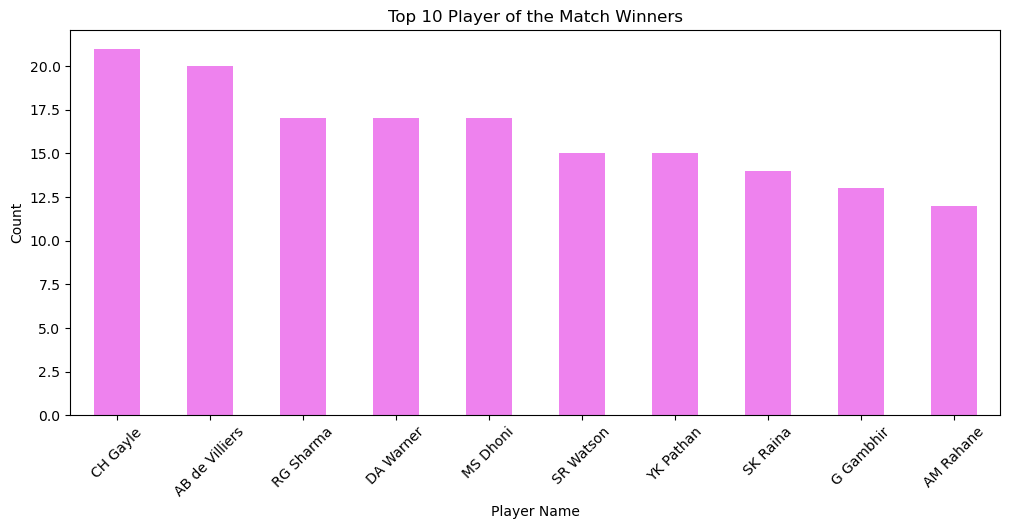

In [22]:
plt.figure(figsize=(12,5))
ipl['player_of_match'].value_counts().head(10).plot(kind='bar', color='violet')
plt.title('Top 10 Player of the Match Winners')
plt.ylabel('Count')
plt.xlabel('Player Name')
plt.xticks(rotation=45)
plt.show()


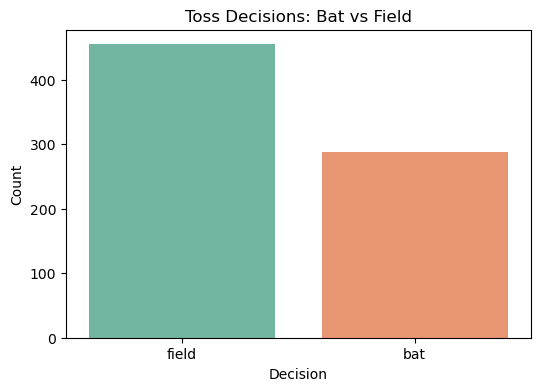

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='toss_decision', data=ipl, palette='Set2')
plt.title('Toss Decisions: Bat vs Field')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()


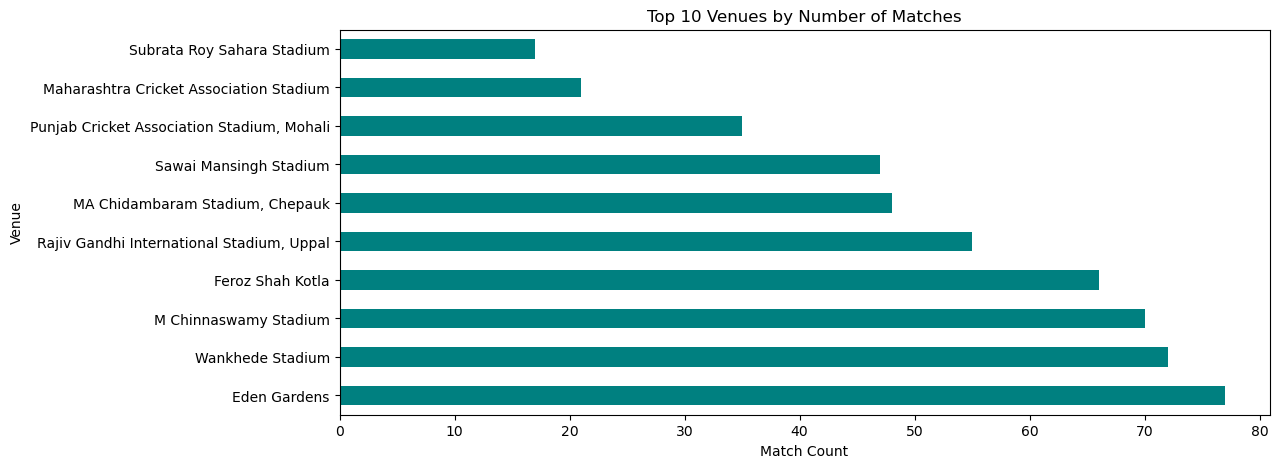

In [24]:
plt.figure(figsize=(12,5))
ipl['venue'].value_counts().head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Venues by Number of Matches')
plt.xlabel('Match Count')
plt.ylabel('Venue')
plt.show()

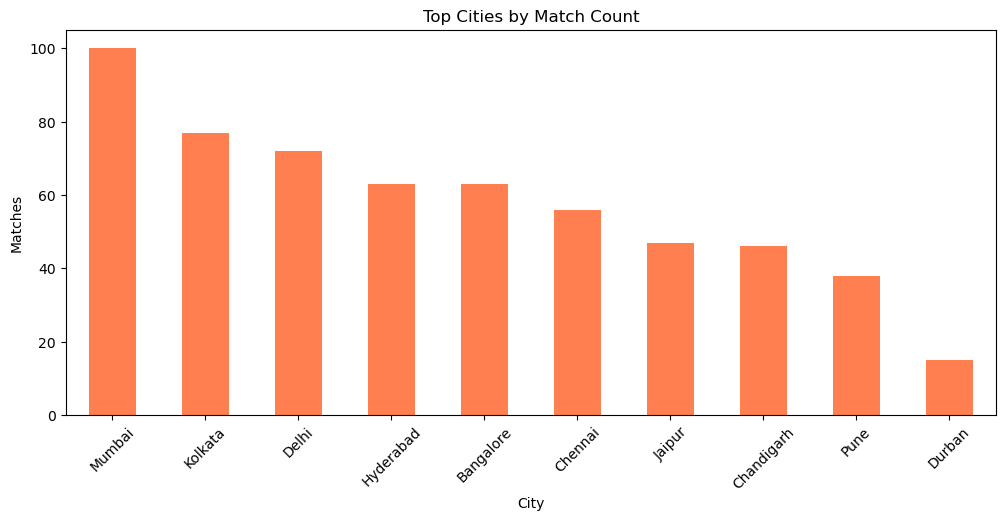

In [25]:
plt.figure(figsize=(12,5))
ipl['city'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title('Top Cities by Match Count')
plt.xlabel('City')
plt.ylabel('Matches')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Group by city and count unique venues for each
unique_city_venue = ipl.groupby('city')['venue'].nunique()

# Display cities with more than one venue
print(unique_city_venue[unique_city_venue > 1])

city
Bengaluru        2
Chandigarh       2
Chennai          2
Delhi            2
Hyderabad        2
Mohali           2
Mumbai           3
Pune             2
Visakhapatnam    2
Name: venue, dtype: int64


In [27]:
# Finding cities with more than one unique venue
cities_multiple_venues = unique_city_venue[unique_city_venue > 1].index

# Filtering the Df for those cities and getting unique venue
venues_in_cities = ipl[ipl['city'].isin(cities_multiple_venues)].groupby('city')['venue'].unique()

for city, venues in venues_in_cities.items():
    print(f"{city}:")
    for venue in venues:
        print(f"  - {venue}")
    print()

Bengaluru:
  - M Chinnaswamy Stadium
  - M. Chinnaswamy Stadium

Chandigarh:
  - Punjab Cricket Association IS Bindra Stadium, Mohali
  - Punjab Cricket Association Stadium, Mohali

Chennai:
  - MA Chidambaram Stadium, Chepauk
  - M. A. Chidambaram Stadium

Delhi:
  - Feroz Shah Kotla
  - Feroz Shah Kotla Ground

Hyderabad:
  - Rajiv Gandhi International Stadium, Uppal
  - Rajiv Gandhi Intl. Cricket Stadium

Mohali:
  - Punjab Cricket Association IS Bindra Stadium, Mohali
  - IS Bindra Stadium

Mumbai:
  - Wankhede Stadium
  - Dr DY Patil Sports Academy
  - Brabourne Stadium

Pune:
  - Maharashtra Cricket Association Stadium
  - Subrata Roy Sahara Stadium

Visakhapatnam:
  - Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium
  - ACA-VDCA Stadium



In [28]:
### Considering only the City for the further analysis.

In [29]:
home_city_map = {
    'Mumbai Indians': 'Mumbai',
    'Delhi Capitals': 'Delhi',
    'Chennai Super Kings': 'Chennai',
    'Kolkata Knight Riders': 'Kolkata',
    'Sunrisers Hyderabad': 'Hyderabad',
    'Royal Challengers Bangalore': 'Bengaluru',
    'Rajasthan Royals': 'Jaipur',
    'Kings XI Punjab': 'Mohali',
    'Gujarat Lions': 'Rajkot',
    'Rising Pune Supergiants': 'Pune',
    'Kochi Tuskers Kerala': 'Kochi',
   
}

In [30]:
def is_home_win(row):
    team = row['winner']
    city = row['city']
    return home_city_map.get(team) == city

ipl['home_win'] = ipl.apply(is_home_win, axis=1)

In [31]:
# Count of matches won at home vs not at home
print(ipl['home_win'].value_counts())

# Percentage
print("Percentage of matches won at home ground:")
print(ipl['home_win'].value_counts(normalize=True) * 100)

home_win
False    483
True     260
Name: count, dtype: int64
Percentage of matches won at home ground:
home_win
False    65.006729
True     34.993271
Name: proportion, dtype: float64


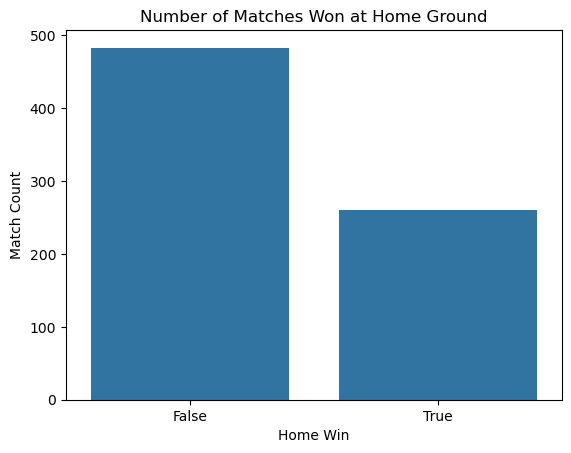

In [32]:
sns.countplot(data=ipl, x='home_win')
plt.title("Number of Matches Won at Home Ground")
plt.xlabel("Home Win")
plt.ylabel("Match Count")
plt.show()

In [33]:
 ipl


,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,toss_match_win,home_win
0,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",False,True
1,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,True,True
2,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,True,False
3,IPL-2017,Indore,08-04-2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,True,False
4,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,True,True
752,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,False,False
753,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,True,False
754,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,True,False


## Machine Learning Models

### LOGISTIC REGRESSION 

In [80]:
### Home Ground Influence:
ipl['team1_home'] = ipl.apply(lambda row: 1 if home_city_map.get(row['team1']) == row['venue'] else 0, axis=1)
ipl['team2_home'] = ipl.apply(lambda row: 1 if home_city_map.get(row['team2']) == row['venue'] else 0, axis=1)

features = ['Season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision',
            'team1_home', 'team2_home', 'win_by_runs', 'win_by_wickets']

# One-hot encode categorical features
X_enc = pd.get_dummies(ipl[features], drop_first=True)

# Target as team name (multi-class)
y = ipl['winner']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2, random_state=42)


In [35]:
# Build pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))
])

# Hyperparameter tuning for Logistic regression 
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l2']
}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000,
                                                           multi_class='multinomial'))]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100],
                         'logreg__penalty': ['l2']},
             scoring='accuracy')

In [36]:
# Evaluation
y_pred = grid.predict(X_test)
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'logreg__C': 0.01, 'logreg__penalty': 'l2'}
Accuracy: 0.610738255033557
Confusion Matrix:
 [[14  0  0  0  0  1  3  1  0  2  0]
 [ 1 13  0  0  0  1  1  0  0  1  2]
 [ 0  0  2  1  0  0  0  0  0  0  0]
 [ 0  1  1  8  0  0  2  1  1  1  2]
 [ 0  0  0  0  1  0  0  0  0  0  0]
 [ 1  1  0  1  0 13  0  0  0  0  0]
 [ 1  1  0  1  0  0 14  3  1  1  0]
 [ 0  0  0  1  0  0  0 15  0  0  1]
 [ 2  0  0  0  0  0  1  0  0  0  0]
 [ 0  3  1  0  0  1  2  0  0  6  3]
 [ 0  1  0  2  0  2  2  0  1  1  5]]

Classification Report:
                              precision    recall  f1-score   support

        Chennai Super Kings       0.74      0.67      0.70        21
             Delhi Capitals       0.65      0.68      0.67        19
              Gujarat Lions       0.50      0.67      0.57         3
            Kings XI Punjab       0.57      0.47      0.52        17
       Kochi Tuskers Kerala       1.00      1.00      1.00         1
      Kolkata Knight Riders       0.72      0.81      

## SVC

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter grid for SVC
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fitting the model on training data
grid_search.fit(X_train_scaled, y_train)

# Evaluating the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# 7. Display results
print(f" Best hyperparameters: {grid_search.best_params_}")
print(f" Best cross-validation accuracy: {grid_search.best_score_:.2f}")
print(" Test Set Accuracy:", accuracy_score(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(" Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
 Best hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
 Best cross-validation accuracy: 0.57
 Test Set Accuracy: 0.6308724832214765
 Confusion Matrix:
 [[14  0  0  0  0  2  4  0  0  1  0]
 [ 2  9  1  2  0  1  0  1  0  1  2]
 [ 0  0  3  0  0  0  0  0  0  0  0]
 [ 0  1  0  9  0  1  2  1  1  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  1]
 [ 1  0  0  1  0 13  0  0  0  0  1]
 [ 4  0  0  1  0  0 14  2  1  0  0]
 [ 0  1  0  1  0  0  1 13  0  0  1]
 [ 1  0  0  0  0  0  0  0  2  0  0]
 [ 0  2  1  0  0  0  1  0  0 10  2]
 [ 1  1  0  1  0  2  1  0  1  0  7]]
 Classification Report:
                              precision    recall  f1-score   support

        Chennai Super Kings       0.61      0.67      0.64        21
             Delhi Capitals       0.64      0.47      0.55        19
              Gujarat Lions       0.60      1.00      0.75         3
            Kings XI Punjab       0.60      0.53      0.56        17
       

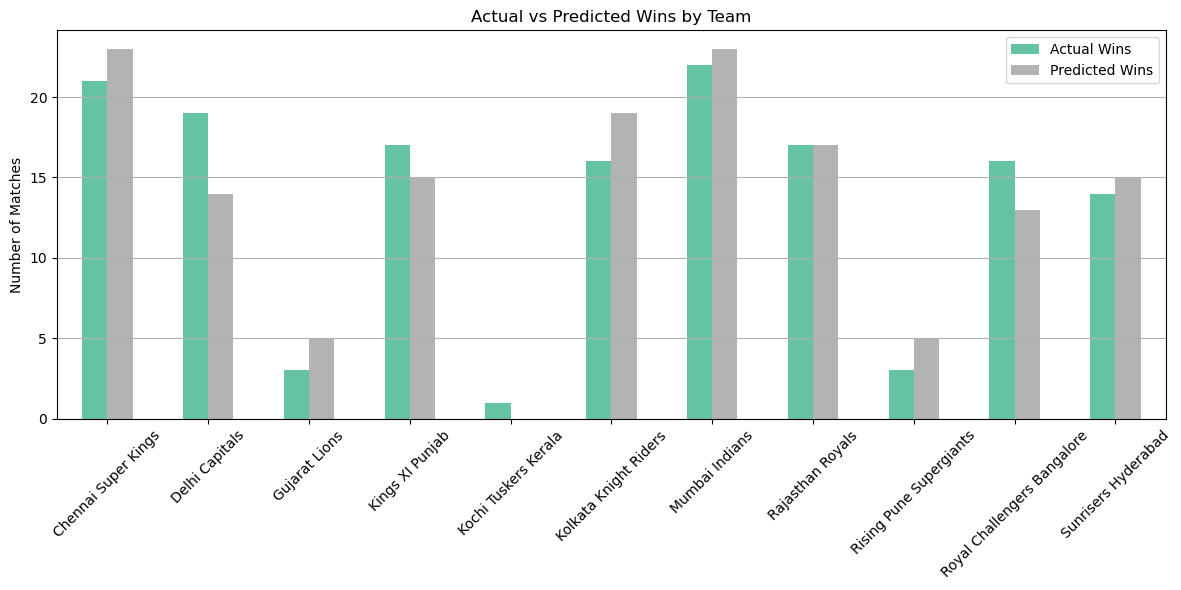

In [38]:
actual_counts = pd.Series(y_test).value_counts().sort_index()
predicted_counts = pd.Series(y_pred).value_counts().sort_index()

# Combine into one DataFrame
comparison_df = pd.DataFrame({
    'Actual Wins': actual_counts,
    'Predicted Wins': predicted_counts
}).fillna(0).astype(int)

# Plot
comparison_df.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Actual vs Predicted Wins by Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


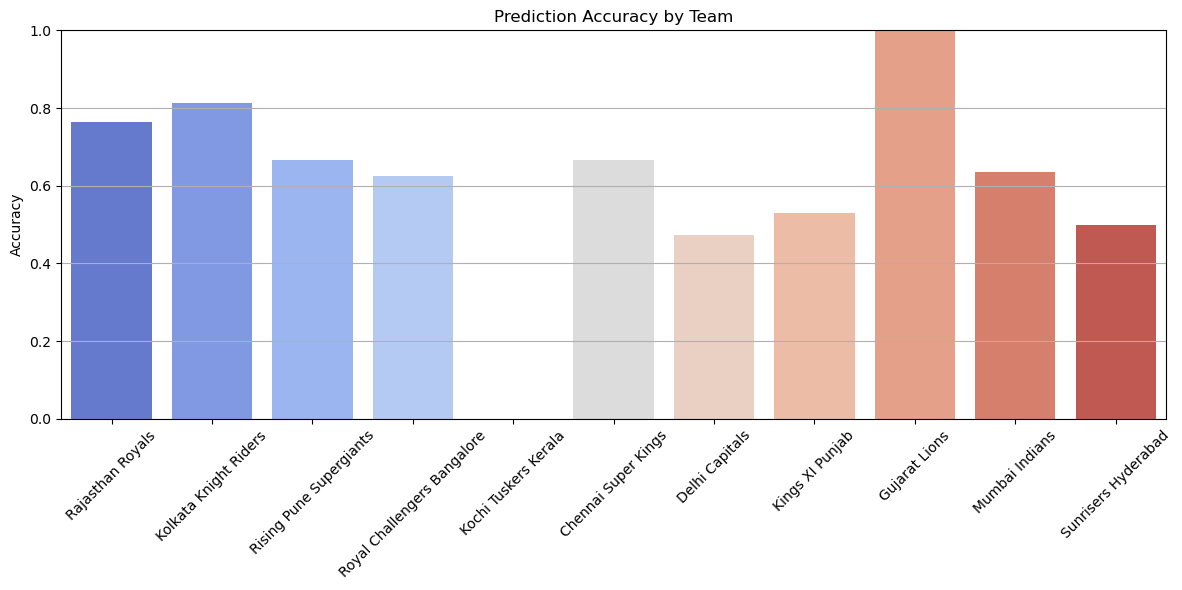

In [39]:
# Create a DataFrame to store team-wise accuracy
team_accuracy = {}

for team in set(y_test):
    team_indices = y_test == team
    acc = accuracy_score(y_test[team_indices], y_pred[team_indices])
    team_accuracy[team] = acc

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(team_accuracy.keys()), y=list(team_accuracy.values()), palette='coolwarm')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy by Team')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## KNN

In [40]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Model (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


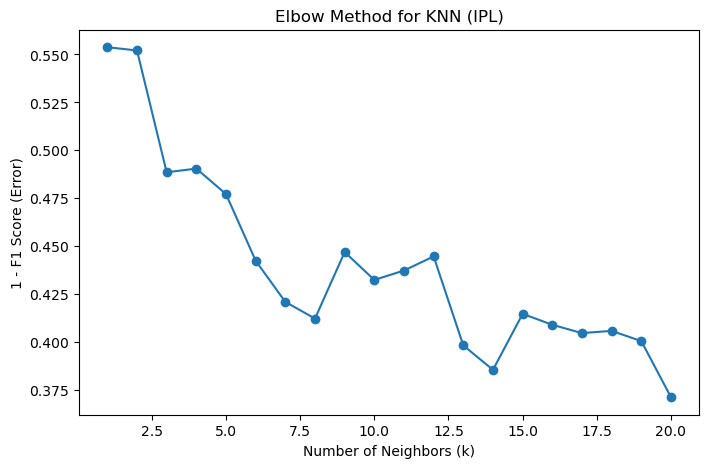

 Best k from Elbow Method: 20


In [43]:
f1_errors = []
K_range = range(1, 21)

for k in K_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred, average='weighted')
    error = 1 - f1
    f1_errors.append(error)

# Plot Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, f1_errors, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("1 - F1 Score (Error)")
plt.title("Elbow Method for KNN (IPL)")
plt.show()

best_k_elbow = K_range[np.argmin(f1_errors)]
print(f" Best k from Elbow Method: {best_k_elbow}")

In [44]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': list(range(10, 21)),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print(" Best Parameters from GridSearchCV:", grid.best_params_)
print(" Best Cross-Validation Accuracy:", grid.best_score_)

 Best Parameters from GridSearchCV: {'knn__metric': 'manhattan', 'knn__n_neighbors': 14, 'knn__weights': 'distance'}
 Best Cross-Validation Accuracy: 0.6229312063808574


In [45]:
best_knn_model = grid.best_estimator_
y_pred_test = best_knn_model.predict(X_test)
print("Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

Test Set Evaluation:
Accuracy: 0.6644295302013423
Confusion Matrix:
 [[15  0  0  0  0  1  3  1  0  1  0]
 [ 1 12  0  0  0  3  0  0  0  1  2]
 [ 0  0  3  0  0  0  0  0  0  0  0]
 [ 0  1  1  8  0  2  2  1  1  0  1]
 [ 0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  0  0  0]
 [ 4  0  0  0  0  0 15  2  0  1  0]
 [ 2  0  0  0  0  0  0 15  0  0  0]
 [ 1  0  0  0  0  1  0  0  1  0  0]
 [ 0  4  1  0  0  0  1  0  0  8  2]
 [ 2  1  0  1  0  2  2  0  1  0  5]]
Classification Report:
                              precision    recall  f1-score   support

        Chennai Super Kings       0.60      0.71      0.65        21
             Delhi Capitals       0.67      0.63      0.65        19
              Gujarat Lions       0.60      1.00      0.75         3
            Kings XI Punjab       0.89      0.47      0.62        17
       Kochi Tuskers Kerala       1.00      1.00      1.00         1
      Kolkata Knight Riders       0.64      1.00      0.78        16
             Mumbai Indian

### DECISION TREE

In [81]:
from sklearn.tree import DecisionTreeClassifier

# Initializing Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Defining hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Applying GridSearchCV 
grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Predicting with the best estimator
best_dt = grid.best_estimator_
y_pred = best_dt.predict(X_test)

# Evaluate
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.9261744966442953
Confusion Matrix:
 [[17  0  0  0  1  1  0  0  1  0  1]
 [ 0 18  0  0  0  0  0  0  0  0  1]
 [ 2  0  1  0  0  0  0  0  0  0  0]
 [ 1  0  0 16  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0 16  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0  1]
 [ 0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0  0 14]]
Classification Report:
                              precision    recall  f1-score   support

        Chennai Super Kings       0.81      0.81      0.81        21
             Delhi Capitals       1.00      0.95      0.97        19
              Gujarat Lions       1.00      0.33      0.50         3
            Kings XI Punjab       1.00      0.94      0.97        17
       Kochi Tuskers Kerala       0.00      0.00      0.00         1
      Kolk

### RANDOM FOREST

In [87]:
features = ['Season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision',
            'team1_home', 'team2_home','win_by_runs', 'win_by_wickets']

X = pd.get_dummies(ipl[features], drop_first=True)

# Target variable
y = ipl['winner']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [88]:
# Random Forest with OOB Score

rf = RandomForestClassifier(oob_score=True, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# OOB score
print(f"OOB Score: {rf.oob_score_:.4f}")

# Predictions
y_pred = rf.predict(X_test)


OOB Score: 0.8939


In [89]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Test Accuracy: 0.9395973154362416
Confusion Matrix:
 [[18  0  0  0  0  2  1  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  1  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0]
 [ 1  0  0 15  0  1  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  0  0  0]
 [ 0  0  0  0  0  0 21  1  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  0  0]
 [ 1  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  1  0  0 15  0]
 [ 0  0  0  0  0  0  0  0  0  0 14]]
Classification Report:
                              precision    recall  f1-score   support

        Chennai Super Kings       0.90      0.86      0.88        21
             Delhi Capitals       1.00      0.95      0.97        19
              Gujarat Lions       1.00      1.00      1.00         3
            Kings XI Punjab       1.00      0.88      0.94        17
       Kochi Tuskers Kerala       1.00      1.00      1.00         1
      Kolkata Knight Riders       0.84      1.00      0.91        16
             Mumbai Indians       0.91    

In [90]:
# Hyperparameter Tuning sor Random Forest

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(oob_score=True, random_state=42),
                           param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [91]:
# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Accuracy of best model
final_pred = best_rf.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, final_pred))


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Final Accuracy: 0.9664429530201343


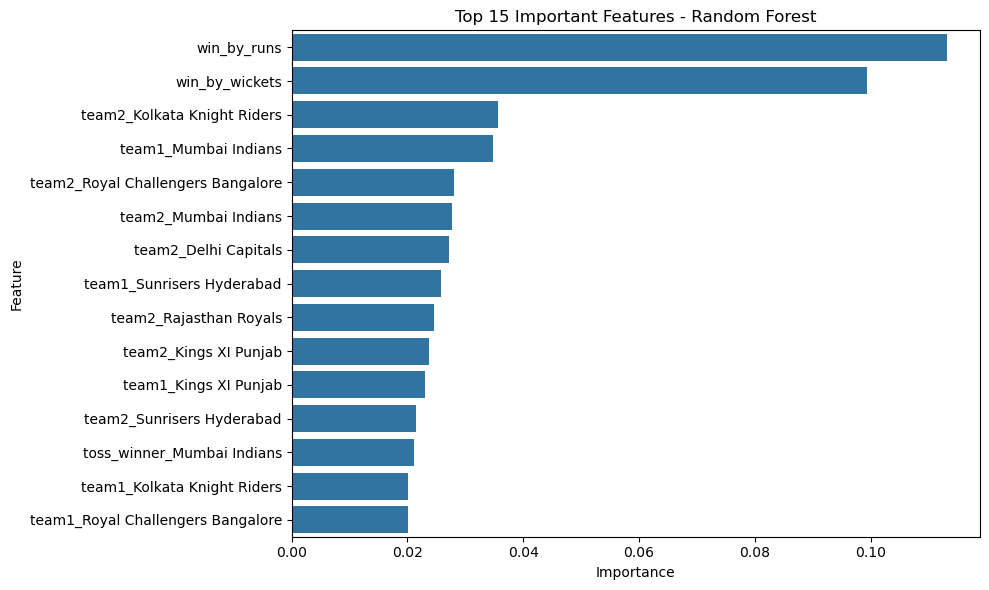

In [92]:
# Feature Importance Plot

importances = best_rf.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15))
plt.title("Top 15 Important Features - Random Forest")
plt.tight_layout()
plt.show()

### XGBOOST

In [65]:
from xgboost import XGBClassifier

In [93]:
X = pd.get_dummies(ipl[features], drop_first=True)

y = ipl['winner']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [94]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# 
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [1, 1.5, 2],
    'reg_alpha': [0, 0.5, 1]
}

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

#  random search
random_search.fit(X_train_scaled, y_train)

#  Evaluate the Best Model ---
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# 
print("Best Parameters:", random_search.best_params_)
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.6}
 Accuracy: 0.9865771812080537
Confusion Matrix:
 [[20  0  0  0  0  1  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  0  0]
 [ 1  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0  0 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        17
           4       1.00    

In [95]:
train_preds = best_model.predict(X_train_scaled)
train_acc = accuracy_score(y_train, train_preds)
print("Train Accuracy:", train_acc)

Train Accuracy: 0.9949494949494949


In [96]:
features = ['Season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision',
            'team1_home', 'team2_home']

X = pd.get_dummies(ipl[features], drop_first=True)

y = ipl['winner']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [97]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# 
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [1, 1.5, 2],
    'reg_alpha': [0, 0.5, 1]
}

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

#  random search
random_search.fit(X_train_scaled, y_train)

#  Evaluate the Best Model ---
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# 
print("Best Parameters:", random_search.best_params_)
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 1, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 1.0}
 Accuracy: 0.6174496644295302
Confusion Matrix:
 [[11  1  0  0  0  1  3  1  0  4  0]
 [ 1  9  0  0  0  4  0  1  2  0  2]
 [ 0  0  3  0  0  0  0  0  0  0  0]
 [ 0  1  1  7  0  1  2  2  0  2  1]
 [ 0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  1  0 14  0  0  0  0  1]
 [ 0  1  0  0  0  0 18  3  0  0  0]
 [ 0  0  0  1  0  1  1 12  0  1  1]
 [ 2  0  0  0  0  0  1  0  0  0  0]
 [ 0  2  1  0  0  0  2  0  0  8  3]
 [ 0  1  0  0  0  1  2  0  0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.52      0.63        21
           1       0.60      0.47      0.53        19
           2       0.60      1.00      0.75         3
           3       0.78      0.41      0.54        17
           4       1.00     